## Exercise 9: Introduction to NetworkX

In this exercise we are going to work with the NetworkX library, which is a very popular python library to work with graphs. Make sure you have this package installed, and have the documentation of the package ready:
https://networkx.github.io/documentation/stable/index.html


In [2]:
import networkx as nx

### Example 1: Creating and Growing a Graph

__a)__ Creation of an empty (undirected) graph

In [3]:
G = nx.Graph()

__b)__ Adding Nodes

In [4]:
# adding single nodes
G.add_node(1)
print(G.nodes())

[1]


In [5]:
# adding nodes from list
G.add_nodes_from([2, 3])
print(G.nodes())

[1, 2, 3]


In [6]:
# add nodes from other graphs
H = nx.path_graph(10)
print(H.nodes())
G.add_nodes_from(H)
print(G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 0, 4, 5, 6, 7, 8, 9]


__c)__ Adding Edges

In [7]:
# add single edge
G.add_edge(1, 2)
print(G.edges())

[(1, 2)]


In [8]:
# Multiple Edges
G.add_edges_from([(2, 5), (4, 6)])

In [9]:
# add edges from other graph
print(H.edges())
G.add_edges_from(H.edges)
print(G.edges())

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
[(1, 2), (1, 0), (2, 5), (2, 3), (3, 4), (4, 6), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


### Example 2: Analysing Graphs

__a)__ Connected Components

In [17]:
# build a second connected component
G.add_edges_from([(10,11),(11,12),(10,12)])

list(nx.connected_components(G))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12}]

__b)__ Accessing Degrees

In [22]:
print(G.degree())

# degree of a certain node
G.degree(3)

[(1, 2), (2, 3), (3, 2), (0, 1), (4, 3), (5, 3), (6, 3), (7, 2), (8, 2), (9, 1), (10, 2), (11, 2), (12, 2)]


2

__c)__ Clustering Coefficients

In [25]:
# note the dictionary structure
nx.clustering(G)

{1: 0,
 2: 0,
 3: 0,
 0: 0,
 4: 0.3333333333333333,
 5: 0.3333333333333333,
 6: 0.3333333333333333,
 7: 0,
 8: 0,
 9: 0,
 10: 1.0,
 11: 1.0,
 12: 1.0}

### Example 3: Drawing a Graph

In [27]:
import matplotlib.pyplot as plt

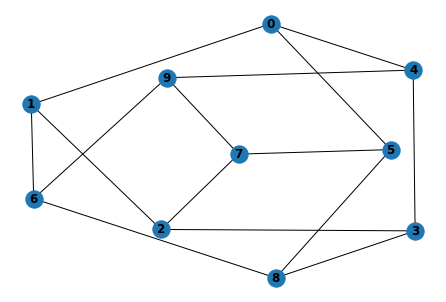

In [28]:
G = nx.petersen_graph()

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()


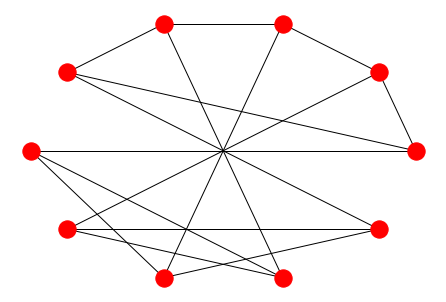

In [33]:
nx.draw_shell(G, node_color = "red", with_labels=False, font_weight='bold')
plt.show()

### Task 0: Load a network file

In the following tasks we are going to investigate a network of jazz musicians, where each node represents a musician, and a connection is drawn if they have colaborated.

Refresh your notebook, and execute the cell below to load the jazz musician network.

In [1]:
import networkx as nx
G = nx.read_edgelist('jazz.txt',nodetype=int)

Note that in all the following tasks, you should try to use functions from the networkX package wherever possible.

### Task 1: Basic statistics

__a)__ Print the number of nodes in G!

In [2]:
G.number_of_nodes()

198

__b)__ Print the number of edges in G!

In [3]:
G.number_of_edges()

2742

__c)__ Give the density of the network!

In [4]:
nx.density(G)

0.14059375480695277

__d)__ Get the node ID and the degree of the node with the highest degree in the network!

In [5]:
D = dict(G.degree)
M = max(D, key=D.get)
print(M, D[M])

135 100


### Task 2: Further Statistics

__a)__	 How many components are there in the network?

In [6]:
nx.number_connected_components(G)

1

__b)__ What is the diameter of the network?

In [7]:
nx.diameter(G)

6

__c)__ Compute the average distance between nodes!


In [8]:
nx.average_shortest_path_length(G)

2.2350407629595446

__d)__	What is the shortest path from node 1 to node 10: Give the length and the node IDs it traverses!

In [9]:
path = nx.shortest_path(G, source = 1, target = 10)
print(path)
print(len(path)-1) #the length of a path is the number of edges it takes!

# alternative way to determine length only: 
# nx.shortest_path_length(G, source = 1, target = 10)

# actually there are many shortest path, list all of them via:
#paths = list(nx.all_shortest_paths(G, source = 1, target = 10))
#print(paths)

[1, 13, 6, 10]
3


__e)__ Print the nodes which have clustering coefficient 1!

In [17]:
B = nx.clustering(G)
[node for node, v in B.items() if v == 1]

[1, 2, 5, 112, 185, 21, 40, 44, 81, 144]

__f)__	What is the average clustering coefficient of the network?

In [12]:
nx.average_clustering(G)

0.6174507021536305

### Task 3: Plotting the Graph

__a)__ Plot the network using a spring layout. For your own enjoyment: try to plot the network with different layouts.

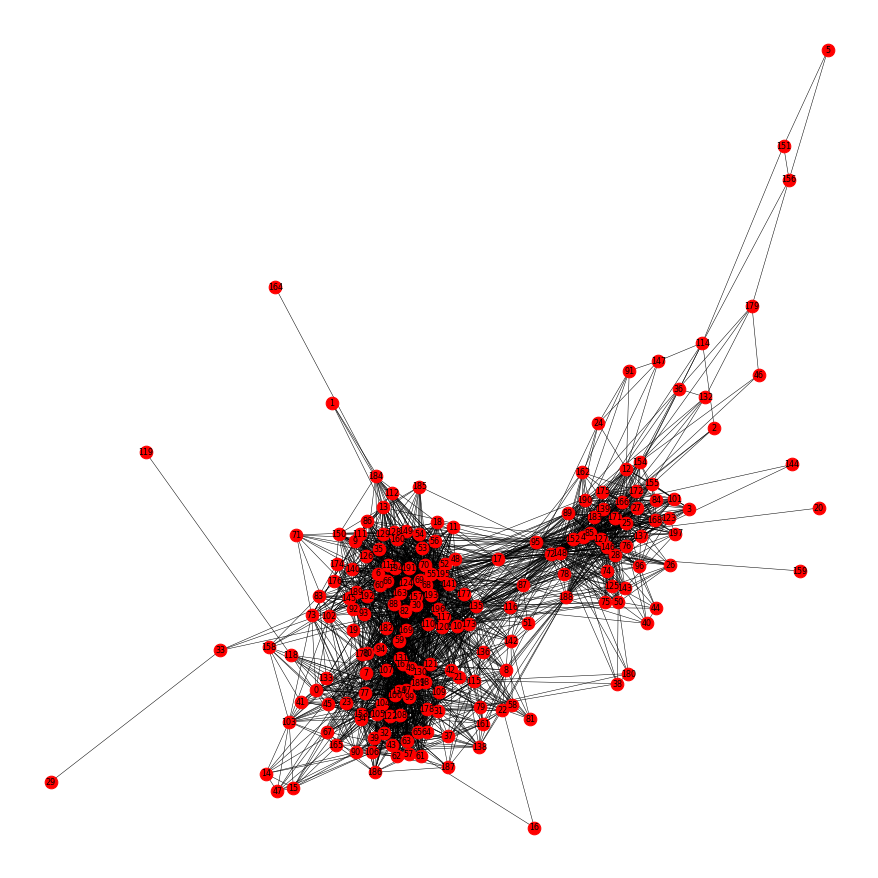

In [18]:
import matplotlib.pyplot as plt

options = {
    'node_size': 160,
    'width': 0.5,
    'with_labels' : True,
    'font_size': 8,
    'node_color': 'red'
}

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G,pos, **options)


__b)__ Plot in green colour the nodes and links of the shortest path in 2.1

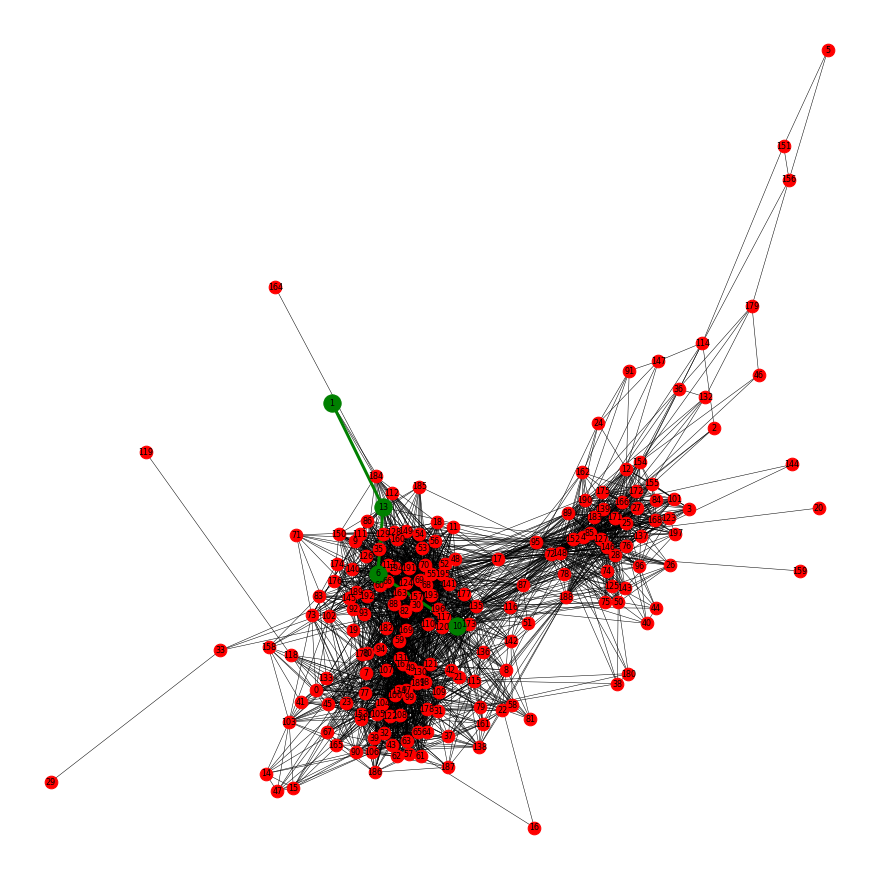

In [19]:
path_edges = list(zip(path[:-1],path[1:]))
plt.figure(figsize=(12,12))
nx.draw(G,pos, **options)
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='green')
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='green',width=3)

### Task 4: Embedded Edges

For each edge calculate the number of neighbors its constituent nodes have in common, sometimes called the embeddedness of an edge. For example: the friendship edge of Tobias and Johannes has embeddedness of 2 if Tobias and Johannes have two friends in common. Remove all edges with embeddedness less than or equal to 2 and plot the resulting network. For your own enjoyment:  think about why the network changed the way it did.

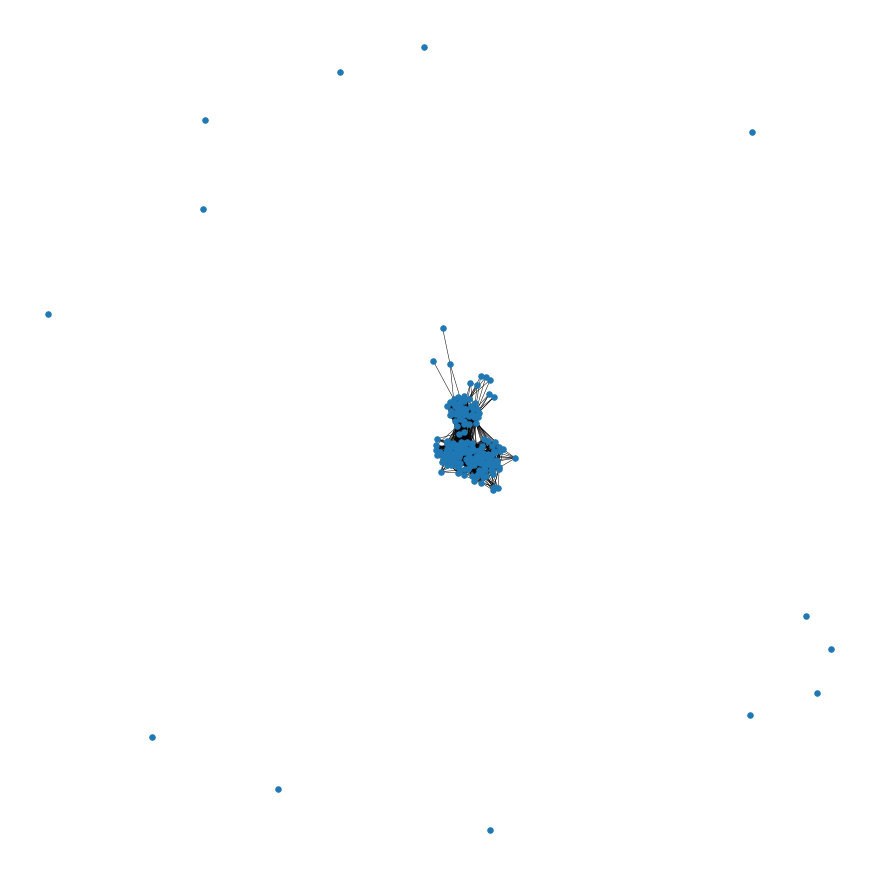

In [20]:
emb_edges = [(u,v) for (u,v) in G.edges if sum(1 for _ in nx.common_neighbors(G,u,v)) > 2]

H = nx.Graph()
H.add_nodes_from(G)
H.add_edges_from(emb_edges)

options = {
    'node_size': 30,
    'width': 0.5
}

plt.figure(figsize=(12,12))
pos = nx.spring_layout(H)
nx.draw(H,pos, **options)